**Using Deep Learning(Neural network) to predict the insurance cost**

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('insurance.csv')
dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# tf.one_hot(dataset['sex'], depth=2)
dic = {'male':1, 'female':0}
dataset['sex'] = dataset['sex'].apply(lambda x: dic[x])

In [6]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [7]:
dataset= pd.get_dummies(dataset, dtype='int32')
dataset

,age,sex,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,16884.92400,0,1,0,0,0,1
1,18,1,33.770,1,1725.55230,1,0,0,0,1,0
2,28,1,33.000,3,4449.46200,1,0,0,0,1,0
3,33,1,22.705,0,21984.47061,1,0,0,1,0,0
4,32,1,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,0,31.920,0,2205.98080,1,0,1,0,0,0
1335,18,0,36.850,0,1629.83350,1,0,0,0,1,0
1336,21,0,25.800,0,2007.94500,1,0,0,0,0,1


In [8]:
X = dataset.drop(['charges'], axis=1)
y = dataset['charges']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# X_train[1]
X_train.shape[1]

10

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(X_train.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(
    loss = tf.keras.losses.MAE,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics = ['mse']
)

model.summary()

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 12736.9668 - mse: 314039232.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7661.4751 - mse: 150019040.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7640.6235 - mse: 163515056.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6937.8545 - mse: 150617152.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6665.7930 - mse: 156568048.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6068.4482 - mse: 145718848.0000
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5993.8345 - mse: 135205968.0000
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5547.6958 - mse: 122296432.0000 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5175.3350 - mse: 107464472.0000
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4089.8306 - mse: 76518256.0000
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3483.4407 - mse: 51468544.0

In [13]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [14]:
model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[ 9090.676 ],
       [ 5235.323 ],
       [30898.738 ],
       [ 9294.396 ],
       [27697.17  ],
       [ 4608.09  ],
       [ 2086.8274],
       [14018.626 ],
       [ 3876.4048],
       [10372.19  ],
       [21210.291 ],
       [ 7055.725 ],
       [ 4125.5054],
       [50074.887 ],
       [51602.33  ],
       [45206.67  ],
       [10117.082 ],
       [42147.184 ],
       [ 8340.753 ],
       [25953.045 ],
       [ 5188.775 ],
       [ 7356.978 ],
       [ 1223.2417],
       [ 2882.3865],
       [11216.793 ],
       [11190.369 ],
       [12681.014 ],
       [ 5326.8994],
       [ 9802.772 ],
       [ 1048.7235],
       [ 7896.615 ],
       [12017.11  ],
       [ 2105.523 ],
       [ 5827.6704],
       [ 3082.807 ],
       [ 7643.8276],
       [ 2635.6099],
       [ 7269.693 ],
       [23689.613 ],
       [37004.543 ],
       [ 4597.091 ],
       [ 2771.4941],
       [11858.141 ],
       [12132.238 ],
       [ 4980.8604],
       [12297.68  ],
       [ 3663.6665],
       [ 4517

In [15]:
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2000.9441 - mse: 24022356.0000 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1824.5615 - mse: 20275432.0000 


[1857.6756591796875, 20842942.0]

Text(0.5, 0, 'epochs')

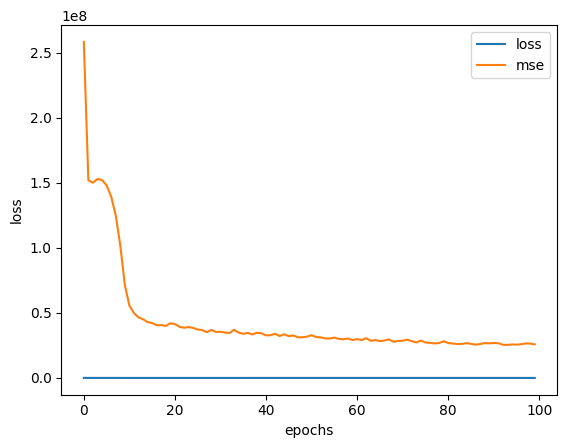

In [16]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

**Preprocessing data(normalization)**
***For a better loss***

In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
prepro_dataset = pd.read_csv('insurance.csv')
prepro_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split


In [23]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi', 'children']),
    (OneHotEncoder(),['sex','smoker','region'])
)

features = prepro_dataset.drop('charges', axis=1)
label = prepro_dataset['charges']

x_train, x_test, y_train, y_tets = train_test_split(features, label, test_size=0.2,random_state=42)

ct.fit(x_train)

x_train_norn = ct.transform(x_train)
x_test_norn = ct.transform(x_test)

In [24]:
x_train_norn[1]

array([0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [27]:
prepro_model = tf.keras.Sequential()
prepro_model.add(tf.keras.layers.Dense(8, input_shape=x_train_norn[1].shape, activation='relu'))
prepro_model.add(tf.keras.layers.Dense(5,activation='relu'))
prepro_model.add(tf.keras.layers.Dense(1))

prepro_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics = ['MSE']
)

prepro_model.summary()

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 8)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147 (588.00 B)

 Trainable params: 147 (588.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
prepro_model.fit(x_train_norn,y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - MSE: 332636160.0000 - loss: 13540.5361
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 156451232.0000 - loss: 7892.7925
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 117241184.0000 - loss: 6723.5171
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 82803912.0000 - loss: 5475.0518 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MSE: 44580056.0000 - loss: 3748.4326
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 43643168.0000 - loss: 3379.8879
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 46264100.0000 - loss: 3276.6853
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 46353772.0000 - loss: 3118.7827
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MSE: 42303180.0000 - loss: 3238.2175
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 45629696.0000 - loss: 3451.7205
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 45869040.0000 - loss: 3228.0728
Epo

In [29]:
prepro_model.evaluate(x_test_norn, y_tets)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MSE: 21432152.0000 - loss: 1862.5900  


[1834.765869140625, 21424414.0]

In [ ]:
# 9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1824.5615 - mse: 20275432.0000